Module A1: Regression -- Overfitting, Underfitting, and Cross-Validation

In [2]:
#import the necessary libraries and functions

import numpy as np
import matplotlib.pyplot as plt

Generate a toy data set with 100 regularly-spaced points and as described by Eq. 8.75-- a simple model where  x  and  y  satisfy the following:
0≤xi≤3 
yi=xisin(xi)+ϵi 
where the noise is drawn from a normal distribution  ϵi∼N(0,0.1)

In [4]:
#create an array with 100 evenly spaced numbers between 0 and 3
x = np.linspace(0,3,100)

In [5]:
#generate an array of 100 random numbers from a normal distribution, where mean=0, standard deviation=0.1

eps = np.random.normal(loc=0, scale =0.1, size=100)

In [6]:
#define function y

y = x*np.sin(x)+eps

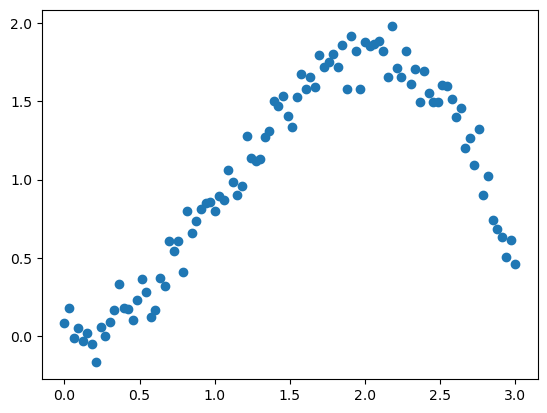

In [7]:
#scatter plot y(x)

plt.scatter(x,y)

Split the data set into training, cross-validation, and test sets with 50%, 25% and 25% ratio.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
#Here, we split the dataset into training set, test set, and cross-validation set. Since train_test_split function can only split two variables, we will first split the dataset into 75% training set and 25% test set

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.75, test_size=0.25, random_state=0)

In [10]:
print(str(X_train.shape) + str(y_train.shape))  #to check if we get the correct size

(75,)(75,)


In [11]:
#We will split the 75% training set from the previous code into 50% training set and 25% cross-validation set

x_train, X_cv, Y_train, y_cv = train_test_split(X_train, y_train, train_size=0.67, test_size=0.33, random_state=0)

In [12]:
print(str(X_cv.shape) + str(y_cv.shape)) #check if we get the desired size

(25,)(25,)


Get the best-fit curve for polynomial degrees  d=0  to 14 for the training set. You can use numpy library's polyfit function


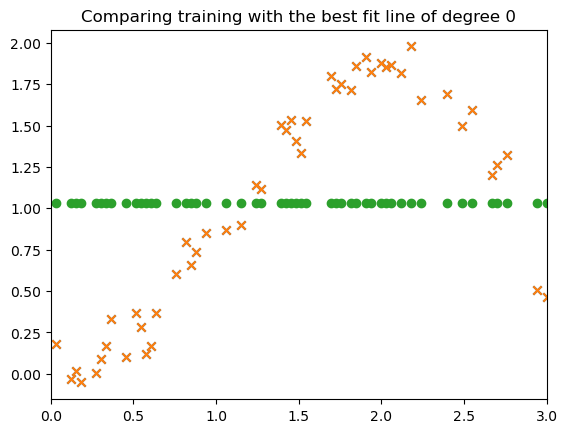

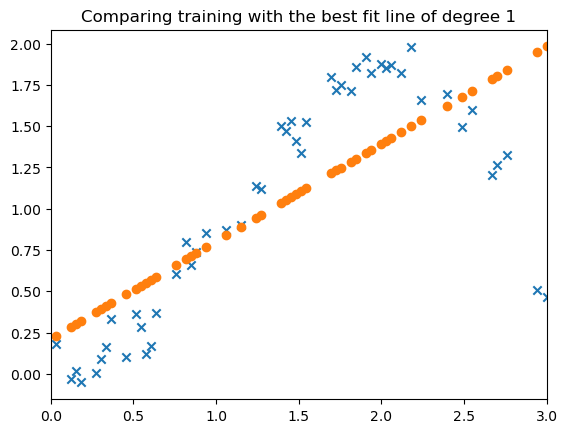

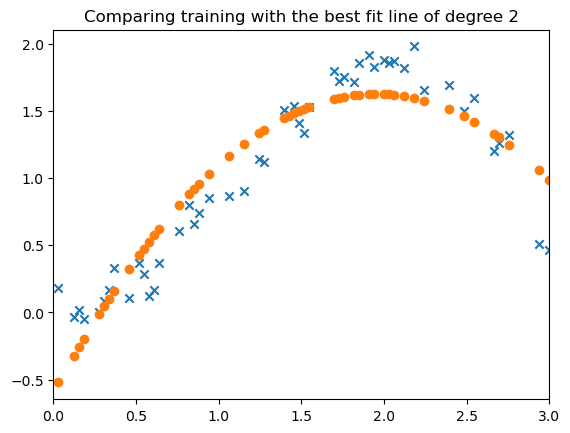

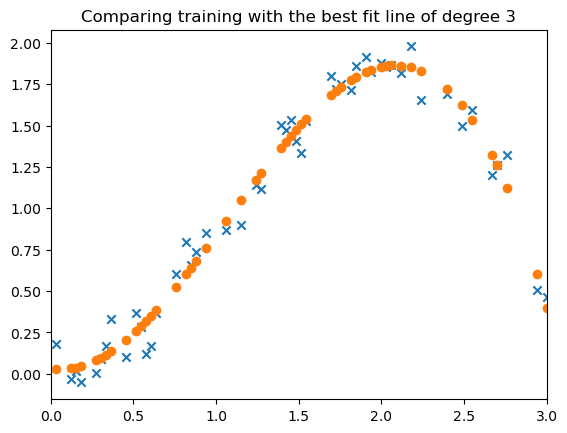

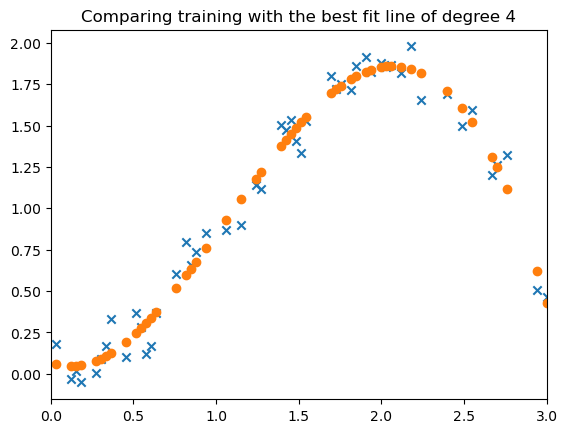

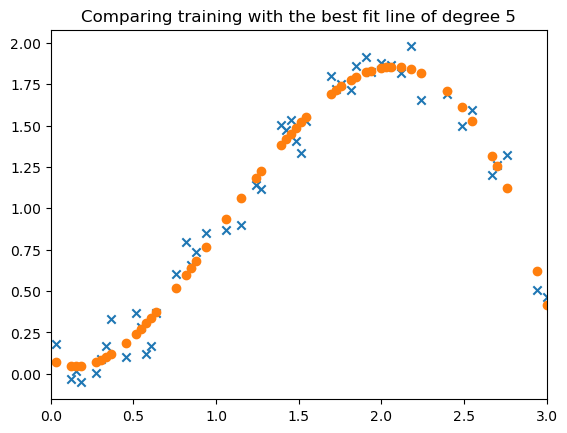

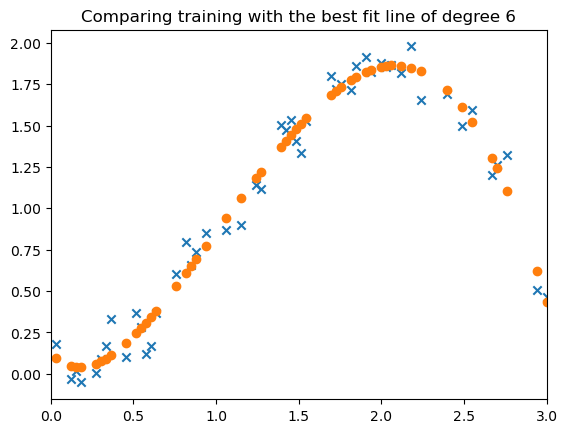

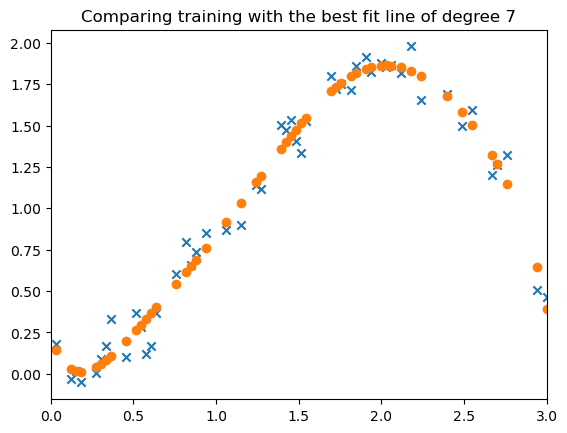

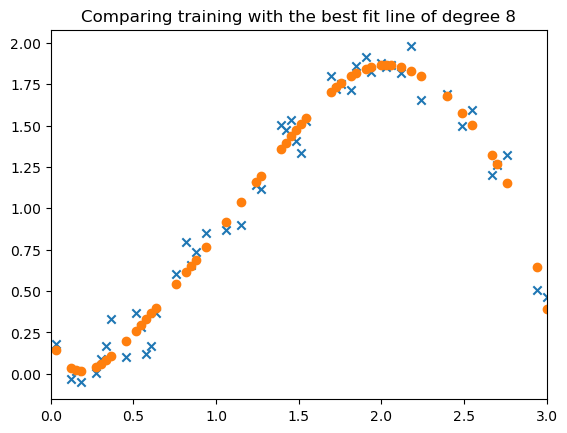

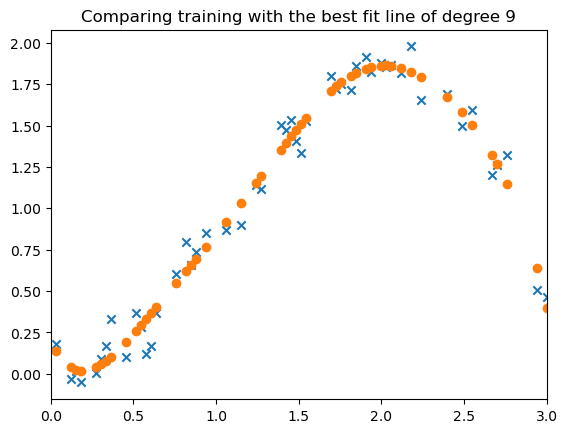

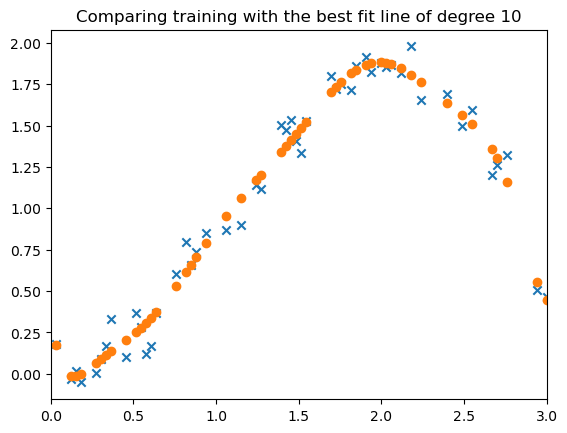

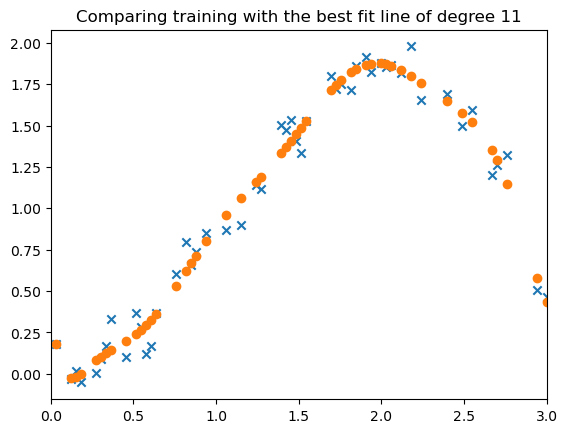

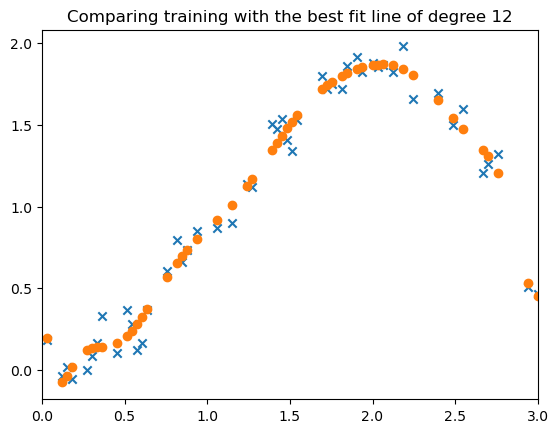

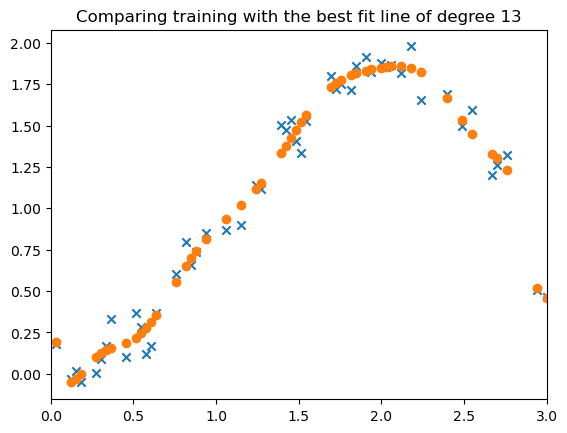

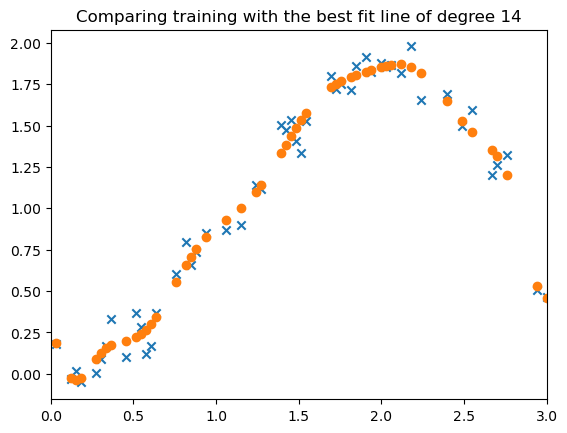

In [13]:
import sklearn


plt.scatter(x_train, Y_train, marker="x") #scatter plot the training data points, where x_train are the input features and Y_train are the target values
yrmse_train = [] #initialize an empty list where we will stre the RMSE for each polynomial degree
for n in range (0,15): #make a loop that iterates over a range from 0 to 14
    p = np.polyfit(x_train, Y_train, n) #fit the polynomial of degree n to the training dataset. 
                                        #It will return the coefficients of the polynomial fit
    poly = np.poly1d(p) #create a polynomial function using the obtained coefficients
    xmse_train = sklearn.metrics.mean_squared_error(Y_train, poly(x_train)) #calculates the MSE between the target values and predicted values

    xrmse_train = np.sqrt(xmse_train) #calculates RMSE by taking the square root of MSE

    yrmse_train.append(xrmse_train) #appends the calculated RMSE to the empty list we created
    
    plt.scatter(x_train, Y_train, marker="x") #plots the training data points
    plt.scatter(x_train, poly(x_train), marker="o") #plots the predicted values we obtained from evaluating the polynomial function at the input features
    plt.title("Comparing training with the best fit line of degree " + str(n))
    plt.xlim(0,3) #sets the limits of x-axis from 0-3
    plt.show() #displays the plot

Get the rms errors for both the training and cross-validation sets

In [14]:
yrmse_cv = [] #initialize an empty list where we will store the RMSE for each poly degree evaluated on the cross-validation set

#This loop will fit polynomial regression models of different degrees to the training dataset and evaulate  on the cross-validation set
for n in range (0,15):
    p = np.polyfit(x_train, Y_train, n)
    poly = np.poly1d(p)
    #calculate MSE between the target values from the cross-validation set and teh predicted value we get as we evaluate poly at X_cv
    xmse_cv = sklearn.metrics.mean_squared_error(y_cv, poly(X_cv)) 

    xrmse_cv = np.sqrt(xmse_cv) #calculates RMSE
    yrmse_cv.append(xrmse_cv) #appends the calculated RMSE to the empty list yrmse_cv

Plot rms errors for both the training and cross-validation sets against polynomial degree  d

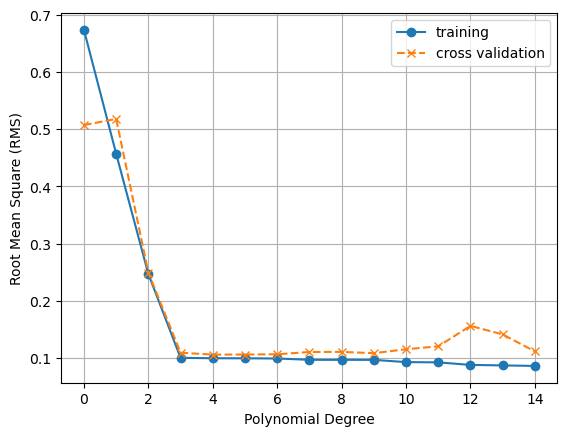

In [16]:
plt.plot(yrmse_train, label="training", marker="o")
plt.plot(yrmse_cv, label="cross validation", marker="x", linestyle="--")
plt.xlabel("Polynomial Degree")
plt.ylabel("Root Mean Square (RMS)")
plt.legend()
plt.grid()
plt.show()

As the degree increases, RMSE decreases. However, RMSE will eventually increase due to overfitting